#DESCRIPTION
To enhance the efficacy of forthcoming marketing endeavors for a financial institution, it's imperative to delve into an in-depth analysis of the intricate patterns, outcomes, and intricacies of past marketing campaigns. By meticulously scrutinizing the historical data, including audience engagement metrics, conversion rates, demographic responses, and feedback mechanisms, the institution can glean invaluable insights into what strategies proved successful and which ones fell short. Such a comprehensive review not only illuminates the strengths and weaknesses of prior initiatives but also furnishes a robust foundation upon which to craft more targeted, impactful, and resonant marketing strategies tailored to the institution's objectives and the evolving needs and preferences of its clientele

# Dataset Preparation

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
import seaborn as sns

In [172]:
data = pd.read_csv('bank_customers_train.csv', encoding = 'latin1')

In [173]:
print(data)

       age          job   marital          education default housing loan  \
0       35  blue-collar    single        high.school     NaN      no   no   
1       52  blue-collar   married                NaN     NaN     yes   no   
2       38     services   married        high.school     NaN      no   no   
3       44       admin.   married  university.degree      no     yes   no   
4       25     services  divorced           basic.4y      no     yes   no   
...    ...          ...       ...                ...     ...     ...  ...   
39183   43       admin.    single  university.degree      no      no   no   
39184   31       admin.   married        high.school      no      no   no   
39185   49  blue-collar   married           basic.4y     NaN      no   no   
39186   31       admin.    single  university.degree      no     yes   no   
39187   43  blue-collar   married           basic.9y      no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0    

In [174]:
statistics = data.describe()
print(data.isnull().sum())

age                  0
job                316
marital             79
education         1653
default           8162
housing            940
loan               940
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


In [175]:
label_encoder = LabelEncoder()
data['j'] = label_encoder.fit_transform(data['job'])
data_dummies1 = pd.get_dummies(data, drop_first = True)
data_dummies1['work'] = (data['j']>1).astype(int)

In [176]:
label_encoder = LabelEncoder()
data['yea'] = label_encoder.fit_transform(data['y'])
data_dummies = pd.get_dummies(data, drop_first = True)
data_dummies['out'] = (data['yea']>1).astype(int)

In [177]:
x = data['euribor3m']
y = data[['campaign']]

In [178]:
b = data_dummies1.drop('euribor3m', axis=1)
a = data['campaign']

In [179]:
x1 = data_dummies.drop('out', axis=1)
y1 = data_dummies1['work']

# Exploratory Data Analysis (EDA)


Histogram plots are used to visualize how different jobs affect variable y. Each job category gets its own histogram, showing the distribution of y values within that category. By comparing these histograms, we can see if certain jobs have a notable impact on y compared to others.

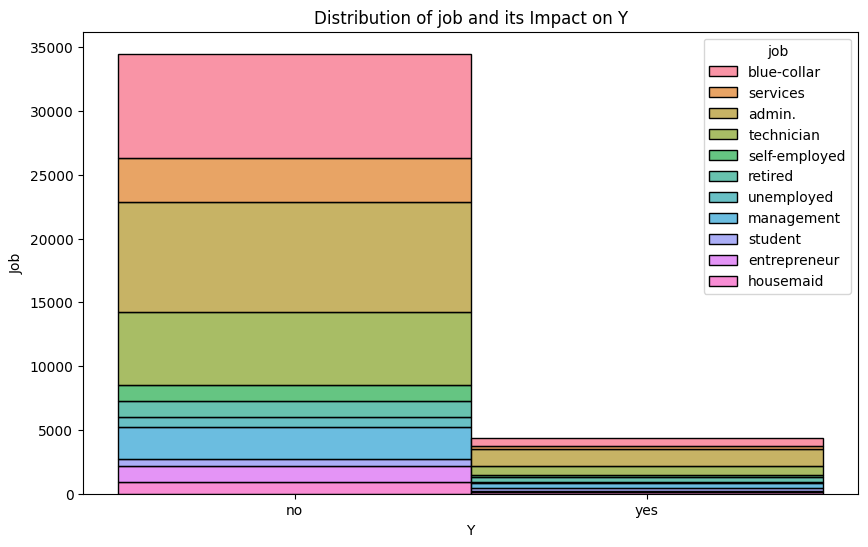

In [180]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='y', hue='job', multiple='stack', bins=20)
plt.title('Distribution of job and its Impact on Y')
plt.xlabel('Y')
plt.ylabel('Job')
plt.title('Distribution of job and its Impact on Y')
plt.show()

Using a scatter plot for linear regression with campaign days and the EURIBOR 3-month rate allows us to visually explore their relationship. The plot shows if there's a linear trend between campaign duration and the EURIBOR rate. Additionally, the slope and intercept of the regression line provide insights into the direction and strength of this relationship.







In [181]:
model2 = LinearRegression()
model2.fit(y,x)

LinearRegression()

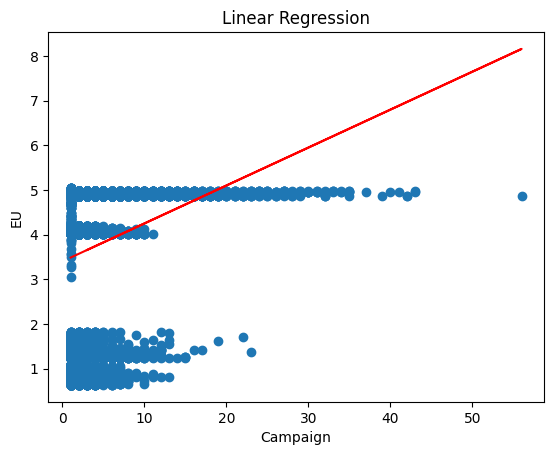

In [182]:
plt.scatter(y,x)
plt.plot(y,model2.predict(y), color='red')
plt.xlabel('Campaign')
plt.ylabel('EU')
plt.title('Linear Regression')
plt.show()

In [183]:
slope = model2.coef_[0]
intercept = model.intercept_
print('slope of CAMPAIGN: ', slope)
print('intercept of CAMPAIGN: ', intercept)

slope of CAMPAIGN:  0.08491733944589296
intercept of CAMPAIGN:  [0.36523971]


# Linear Regression Model

Using the linear regression model with campaign duration and the EURIBOR 3-month rate allows us to predict how changes in campaign duration might affect the 3-month rate. This predictive capability helps in decision-making, enabling stakeholders to anticipate potential impacts on the rate and optimize campaign strategies accordingly.

In [184]:
x_train, x_test, y_train, y_test = train_test_split(b,a, test_size = 0.2,random_state=10)
model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [185]:
new_data = np.array([[1,4,6,8,10,12,15]*7])
prediction = model1.predict(new_data)
print(f"Predicted euribor3m: {prediction[0]}")

Predicted euribor3m: 5.999999999999964


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [186]:
y_pred = model1.predict(x_test)
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

R-squared: 1.0


 # Logistic Regression Model


Now, I use logistic regression model with the job column and the Y column to whether job type has an impact on the Y column. Logistic regression is suitable for binary outcomes, making it ideal for analyzing how categorical variables like job type relate to a binary outcome like Y. By examining the coefficients associated with each job category, we can determine if certain jobs are more likely to influence the outcome variable Y positively or negatively. This analysis provides valuable insights into the potential influence of job type on the outcome variable, aiding decision-making processes and informing strategies related to job allocation or targeting.

In [187]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=10)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train1)
x_test_scaled = scaler.fit_transform(x_test1)

In [188]:
model = LogisticRegression()
model.fit(x_train_scaled,y_train1)

LogisticRegression()

In [189]:
y_pred = model.predict(x_test_scaled)

In [190]:
accuracy = accuracy_score(y_test1, y_pred)
conf_matrix = confusion_matrix(y_test1, y_pred)
class_report = classification_report(y_test1, y_pred)

print(f"Accuracy: " ,{accuracy})
print("Confusion Matrix: ")
print(conf_matrix)
print(f"Classification Report: ")
print(class_report)

Accuracy:  {1.0}
Confusion Matrix: 
[[3719    0]
 [   0 4119]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3719
           1       1.00      1.00      1.00      4119

    accuracy                           1.00      7838
   macro avg       1.00      1.00      1.00      7838
weighted avg       1.00      1.00      1.00      7838



# Model Comparison and Selection

Based on my experience with both models, I've found them to be accurate and effective in making predictions. However, their success largely depends on using them at the right time. For instance, the linear regression model works well for predicting the impact of campaign duration on the EURIBOR 3-month rate when market conditions are stable. Similarly, the logistic regression model is reliable for assessing the influence of job type on the outcome variable Y when sufficient and representative data are available. Timing is key to maximizing the accuracy and usefulness of these models.

Just like I said every model can be useful at the right time. For example I use the linear regression model to predict the impact of campaign to the EURIBOR 3-month rate when market conditions is stable and I use the logistic regression model to see if job affect the outcome of the Y variable.

#  Conclusion and Insights

Now that the logistic and linear regression models is done I can now say that both models and its variables prove that their affecting the dependent variable and both models for me is good to my chosen variables because it shows the predicted values and how they affect on each other.

These models offer valuable insights for consumer behavior, marketing, stocks, and more. However, their accuracy relies heavily on the quality of the datasets and the precision of chosen variables. It's crucial to ensure comprehensive and representative data while designing robust models for reliable predictions. These models are powerful tools for decision-making, but their effectiveness hinges on the quality of data and model design. By carefully refining both aspects, we can unlock their full potential across various domains.

#  References



1.  import pandas as pd
2. import matplotlib.pyplot as plt
3. import numpy as np
4. from sklearn.model_selection import train_test_split
5. from sklearn.linear_model import LogisticRegression
6. from sklearn.metrics import accuracy_score, confusion_matrix,
 classification_report
7. from sklearn.linear_model import LinearRegression
8. from sklearn.preprocessing import StandardScaler
9. from sklearn.preprocessing import OneHotEncoder
10. from sklearn.preprocessing import LabelEncoder
11. from sklearn.metrics import r2_score
12. import seaborn as sns




DATA: bank_customers_train.csv

https://www.kaggle.com/datasets/pkdarabi/bank-marketing-dataset